In [22]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
dataset1 = "/content/drive/MyDrive/Telecom Customer Churn.csv"
df = pd.read_csv(dataset1, header=0)
target_variable = "Churn"
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **DATA OVERVIEW AND VISUALIZATION**


---




In [49]:
print("Total Rows in the dataset:", df.shape[0])
print("\nTotal number of features:", df.shape[1])
print("\nThe Features of dataset are:")
print(df.columns.tolist())

Total Rows in the dataset: 7043

Total number of features: 20

The Features of dataset are:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [51]:
#Check for Missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
#Check for unique values for each feature
print("\nUnique values:" + "\n" + str(df.nunique()))


Unique values:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


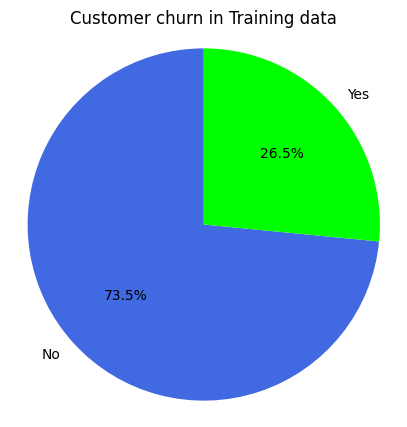

In [53]:
import matplotlib.pyplot as plt

labels = df["Churn"].value_counts().keys().tolist()
values = df["Churn"].value_counts().values.tolist()
colors = ['royalblue', 'lime']

# creating pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer churn in Training data')
plt.axis('equal')

plt.show()


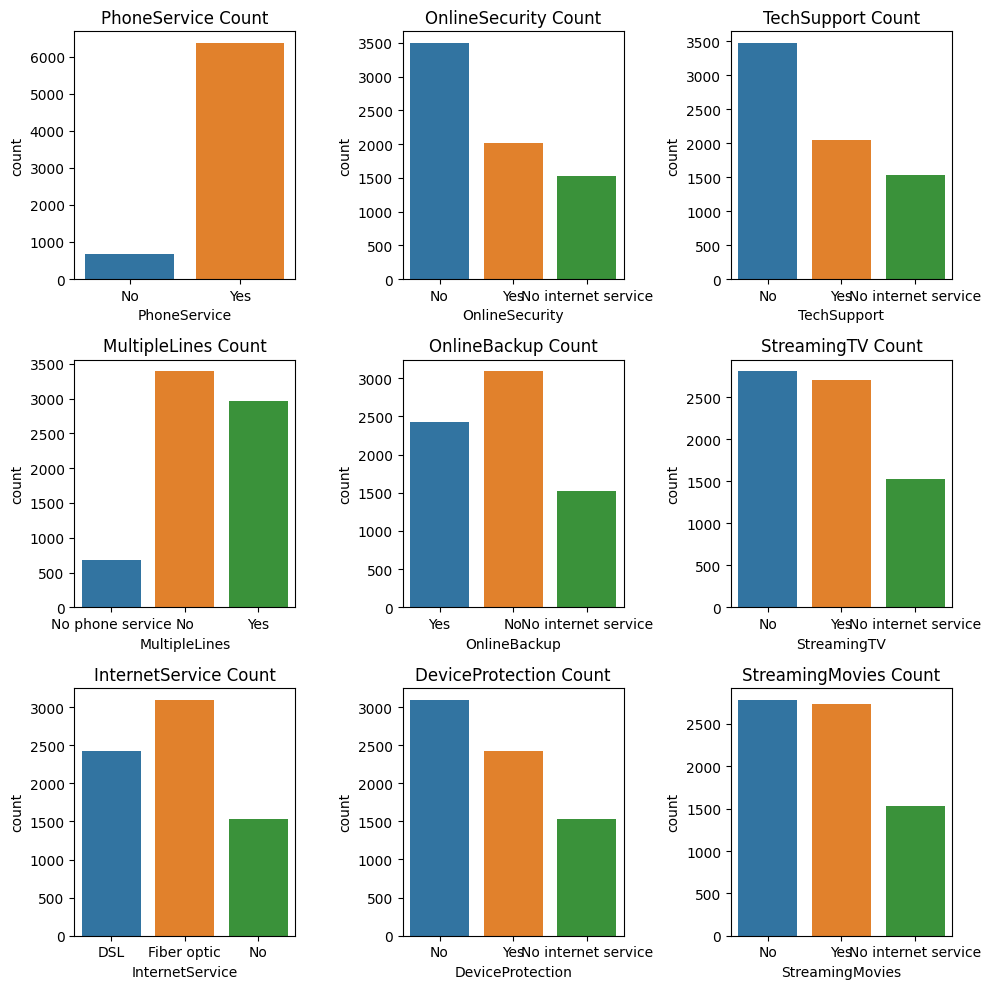

In [56]:
features_plot = ['PhoneService', 'OnlineSecurity', 'TechSupport', 'MultipleLines',
                    'OnlineBackup', 'StreamingTV', 'InternetService', 'DeviceProtection',
                    'StreamingMovies']
plt.figure(figsize=(10, 10))
for i, feature in enumerate(features_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()


## **DATA PREPROCESSING**


---




In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [59]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [60]:
#Convert Total charges feature to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [62]:
#15 categorical features to be one hot encoded
categorical_cols1 = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

## **Correlation**

---



In [64]:
#Finding correlation of features with Churn
correlation_matrix = df.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


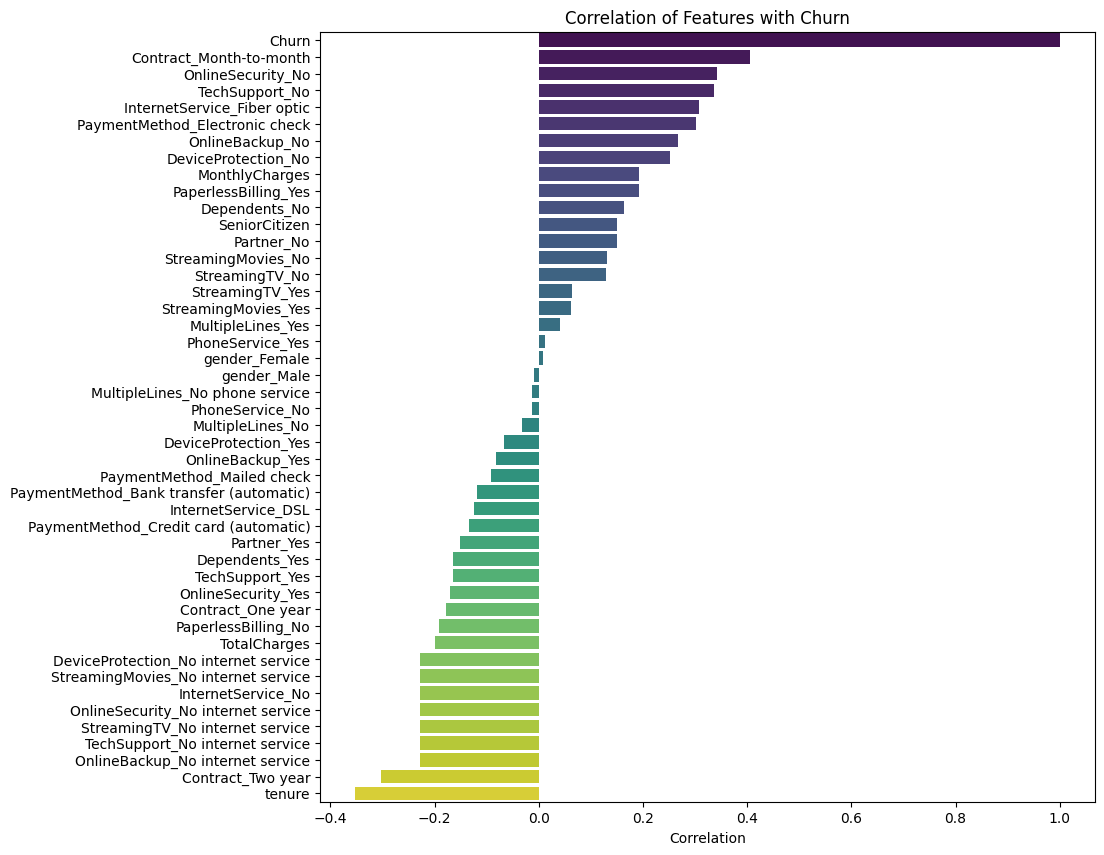

In [65]:
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index, orient='h', palette='viridis')
plt.xlabel('Correlation')
plt.title('Correlation of Features with Churn')
plt.show()

In [66]:
#Dropping columns having low with low correlation with Churn
threshold = 0.15
correlation_with_churn = correlation_matrix['Churn'].abs()
low_correlation_columns = correlation_with_churn[correlation_with_churn < threshold].index.tolist()
df1 = df.drop(low_correlation_columns, axis=1)
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_Fiber optic,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,0,1,29.85,29.85,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,34,56.95,1889.50,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,2,53.85,108.15,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,45,42.30,1840.75,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,1


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   MonthlyCharges                        7043 non-null   float64
 3   TotalCharges                          7032 non-null   float64
 4   Churn                                 7043 non-null   int64  
 5   Partner_No                            7043 non-null   uint8  
 6   Partner_Yes                           7043 non-null   uint8  
 7   Dependents_No                         7043 non-null   uint8  
 8   Dependents_Yes                        7043 non-null   uint8  
 9   InternetService_Fiber optic           7043 non-null   uint8  
 10  InternetService_No                    7043 non-null   uint8  
 11  OnlineSecurity_No

In [68]:
#Scale the Charges columns
from sklearn.preprocessing import StandardScaler
columnsto_scale = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df1[columnsto_scale] = scaler.fit_transform(df1[columnsto_scale])
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_Fiber optic,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,0,1,-1.160323,-0.994194,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,34,-0.259629,-0.173740,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,2,-0.362660,-0.959649,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,45,-0.746535,-0.195248,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,2,0.197365,-0.940457,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,1


In [74]:
df1.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                            11
Churn                                    0
Partner_No                               0
Partner_Yes                              0
Dependents_No                            0
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_No internet service         0
DeviceProtection_No                      0
DeviceProtection_No internet service     0
TechSupport_No                           0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_Mo

In [75]:
df1 = df1.dropna()

## **MODEL BUILDING**


---




In [76]:
X = df1.drop(['Churn'], axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,0,1,-1.160323,-0.994194,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,34,-0.259629,-0.173740,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,2,-0.362660,-0.959649,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,45,-0.746535,-0.195248,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,2,0.197365,-0.940457,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [77]:
X.isnull().sum()

SeniorCitizen                           0
tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Partner_No                              0
Partner_Yes                             0
Dependents_No                           0
Dependents_Yes                          0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No                         0
OnlineBackup_No internet service        0
DeviceProtection_No                     0
DeviceProtection_No internet service    0
TechSupport_No                          0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingMovies_No internet service     0
Contract_Month-to-month                 0
Contract_One year                 

In [78]:
y = df1['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [79]:
#Using Synthetic Minority Oversampling Technique to convert to balanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

To divide the data set, first we are dividing the dataset into two parts - 60% for training and a temporary 40%.
In the next step, the remaining 40% is divided equally into validation set and testing set

In [80]:
# Splitting the data into train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, train_size=0.6, test_size=0.4, random_state=100)

In [81]:
# Splitting the remaining 40% into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.5, test_size=0.5, random_state=100)

In [82]:
X_train.shape

(6195, 28)

In [83]:
X_test.shape

(2066, 28)

In [84]:
X_valid.shape

(2065, 28)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

**LOGISTIC REGRESSION**

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model_logistic = LogisticRegression()

In [98]:
# We define the hyperparameters to tune using grid search
parameters_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # C values
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization used
    'max_iter': [100, 200, 300],  # Max no. of iterations
}
# We use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model_logistic, param_grid=parameters_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
C_best = best_parameters['C']
solver_best = best_parameters['solver']
best_max_iterations = best_parameters['max_iter']

print("The best Hyperparameters for this model are:")
print(f"C: {C_best}, Solver: {solver_best}, Max Iterations: {best_max_iterations}\n")

The best Hyperparameters for this model are:
C: 10, Solver: lbfgs, Max Iterations: 200



In [99]:
# Train the classifier with the best hyperparameters
best_clf = LogisticRegression(C=C_best, solver=solver_best, max_iter=best_max_iterations)
best_clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [100]:
# Evaluate the model on the training set
y_train_pred = best_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print("The Training Performance is:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

# Evaluate the model on the validation set
y_valid_pred = best_clf.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')

print("The Validation Performance is:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}\n")

# Evaluate the model on the testing set
y_test_pred = best_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("The Testing Performance is:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}\n")

The Training Performance is:
Accuracy: 0.8250
Precision: 0.8267
Recall: 0.8250
F1 Score: 0.8248

The Validation Performance is:
Accuracy: 0.8237
Precision: 0.8258
Recall: 0.8237
F1 Score: 0.8233

The Testing Performance is:
Accuracy: 0.8258
Precision: 0.8277
Recall: 0.8258
F1 Score: 0.8255



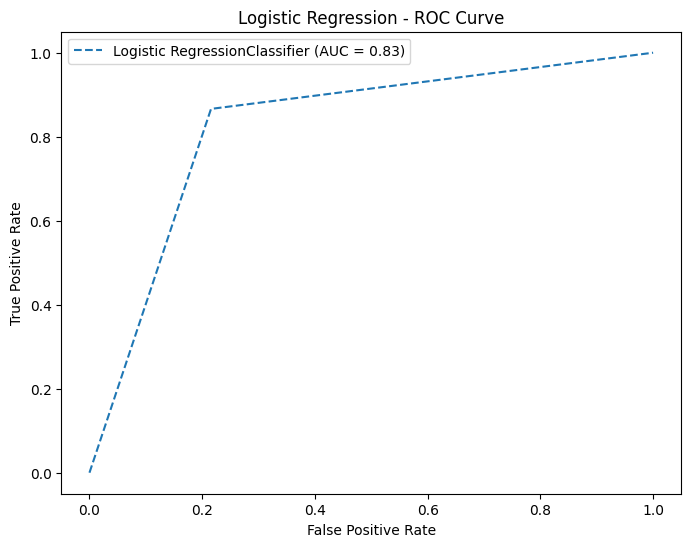

In [97]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
#Calculating Area Under Curve
log_auc = roc_auc_score(y_test, y_test_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic RegressionClassifier (AUC = %0.2f)' % log_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend()
plt.show()

**Decision Tree**

Decision Tree Classifier Accuracy:  0.7797676669893514


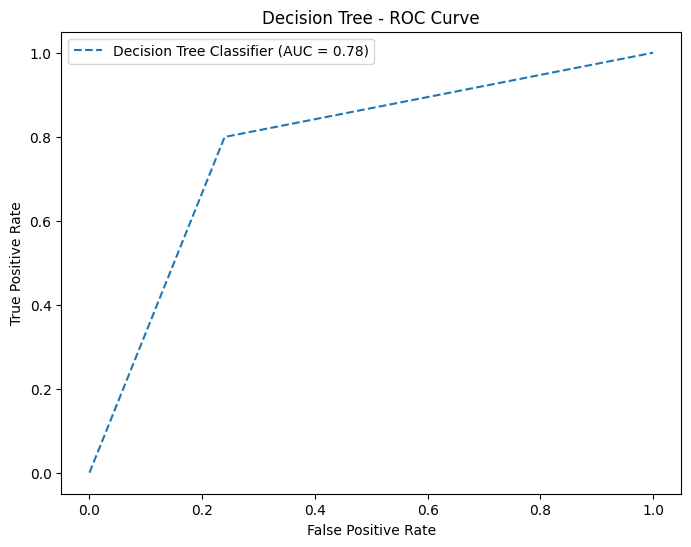

In [108]:
from sklearn.tree import DecisionTreeClassifier
#Defining and training the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Prediciting from the test data
dt_predictions = dt_model.predict(X_test)

#Calculating Area Under Curve
dt_auc = roc_auc_score(y_test, dt_predictions)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_predictions)

#Evaluating the performance of the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy: ", dt_accuracy)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_accuracy)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.show()


**SVM**

In [101]:
from sklearn.svm import SVC

# Create the Support Vector Machine classifier
SVM_Classifier = SVC()

In [104]:
# Define hyperparameters to tune using Grid Search
param_grid = {
    'C': [0.1, 1],  # Regularization
    'kernel': ['linear'],  # Kernel type
    'degree': [2],  # Degree for polynomial kernel
    'gamma': ['auto']
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVM_Classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_C = best_parameters['C']
best_kernel = best_parameters['kernel']
best_degree = best_parameters['degree'] if 'degree' in best_parameters else None
best_gamma = best_parameters['gamma']

# Print the results
print("The Best Hyperparameters for SVM model are:")
print(f"C: {best_C}, Kernel: {best_kernel}, Degree: {best_degree}, Gamma: {best_gamma}\n")

# Train the classifier with the best hyperparameters
best_SVM = SVC(C=best_C, kernel=best_kernel, degree=best_degree, gamma=best_gamma, probability=True)
best_SVM.fit(X_train, y_train)

The Best Hyperparameters for SVM model are:
C: 1, Kernel: linear, Degree: 2, Gamma: auto



SVC(C=1, degree=2, gamma='auto', kernel='linear', probability=True)

In [105]:
# Evaluate the model on the training set
y_train_pred = best_SVM.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("The Training Performance is:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

# Evaluate the model on the validation set
y_valid_pred = best_SVM.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')

print("The Validation Performance is:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}\n")

# Evaluate the model on the testing set
y_test_pred = best_SVM.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("The Testing Performance is :")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}\n")

The Training Performance is:
Accuracy: 0.8208
Precision: 0.8227
Recall: 0.8208
F1 Score: 0.8206

The Validation Performance is:
Accuracy: 0.8131
Precision: 0.8152
Recall: 0.8131
F1 Score: 0.8126

The Testing Performance is :
Accuracy: 0.8224
Precision: 0.8248
Recall: 0.8224
F1 Score: 0.8220



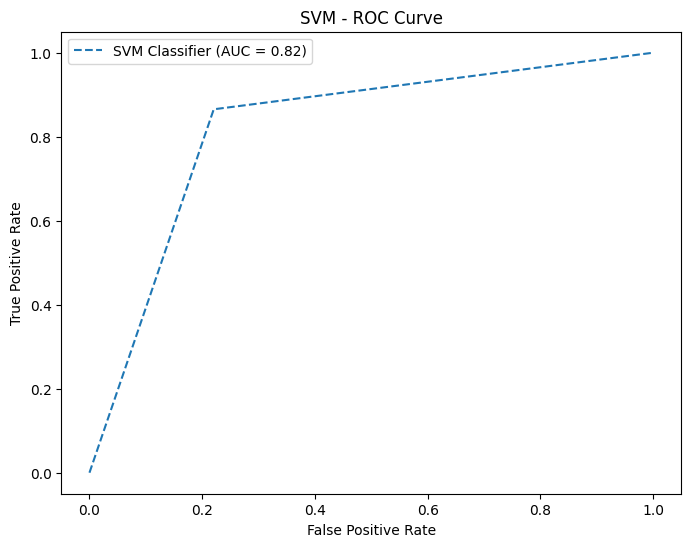

In [106]:
#Calculating Area Under Curve
svm_auc = roc_auc_score(y_test, y_test_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='SVM Classifier (AUC = %0.2f)' % svm_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.legend()
plt.show()

**Random Forest Classifier**

In [109]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameters to tune using grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best hyperparameters using grod search
best_parameters = grid_search.best_params_
best_n_estimators = best_parameters['n_estimators']
best_max_depth = best_parameters['max_depth']
best_min_samples_split = best_parameters['min_samples_split']
best_min_samples_leaf = best_parameters['min_samples_leaf']

print("The best Hyperparameters are:")
print(f"Number of Trees: {best_n_estimators}, Max Depth: {best_max_depth}, Min Samples Split: {best_min_samples_split}, Min Samples Leaf: {best_min_samples_leaf}\n")


The best Hyperparameters are:
Number of Trees: 100, Max Depth: 20, Min Samples Split: 2, Min Samples Leaf: 2



In [110]:
rf_classifier = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [111]:
# Evaluate the model on the training set
y_train_pred = rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("Training Performance:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

# Evaluate the model on the validation set
y_valid_pred = rf_classifier.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')

print("Validation Performance:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}\n")

# Evaluate the model on the testing set
y_test_pred = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')


print("Testing Performance:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}\n")

Training Performance:
Accuracy: 0.9403
Precision: 0.9412
Recall: 0.9403
F1 Score: 0.9402

Validation Performance:
Accuracy: 0.8257
Precision: 0.8264
Recall: 0.8257
F1 Score: 0.8255

Testing Performance:
Accuracy: 0.8320
Precision: 0.8330
Recall: 0.8320
F1 Score: 0.8319



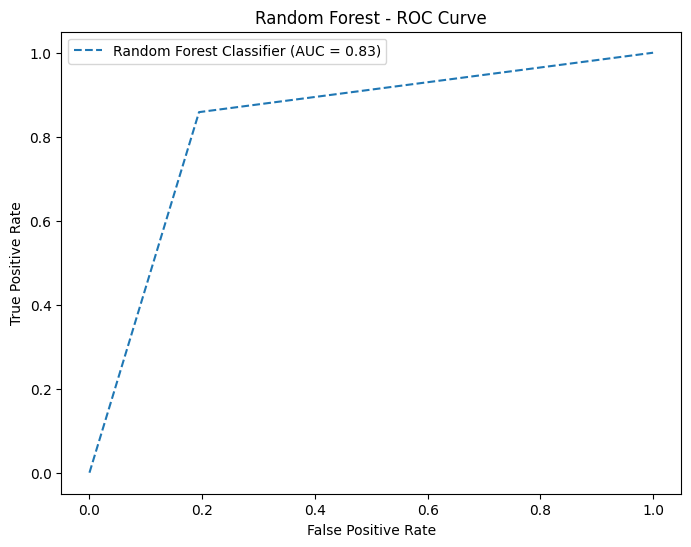

In [112]:
#Calculating Area Under Curve
rf_auc = roc_auc_score(y_test, y_test_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

In [113]:
#Feature importance of random classifier
feature_importance = rf_classifier.feature_importances_
print(feature_importance)

[0.01008665 0.13841986 0.13524361 0.14125481 0.01332128 0.01249221
 0.01066263 0.01564069 0.0281879  0.00856777 0.03524478 0.00753629
 0.04154924 0.01567071 0.00816208 0.01561366 0.00394118 0.05144623
 0.00688499 0.02972942 0.00636983 0.0029509  0.10628329 0.0391711
 0.05775506 0.02458202 0.01441618 0.01881564]


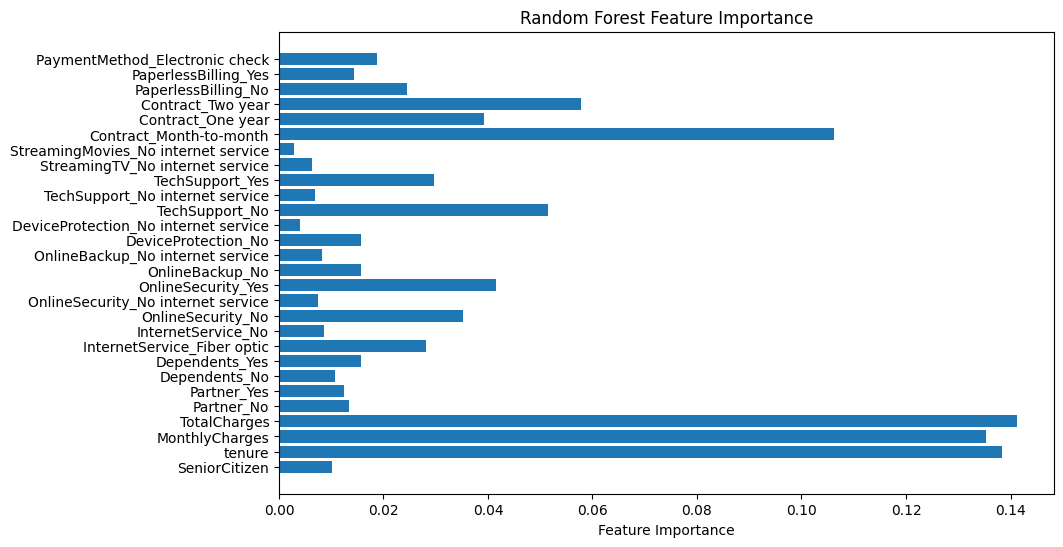

In [114]:
# plot and analyze the feature importance
feature_names = X.columns.tolist()
n_features = len(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(n_features), feature_importance, align='center')
plt.yticks(range(n_features), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

**ADABOOST**

AdaBoost Classifier Accuracy:  0.8068731848983544


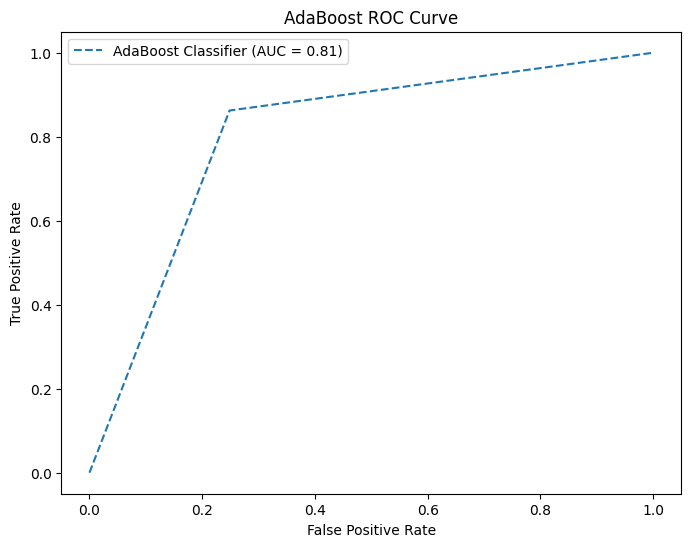

In [116]:
from sklearn.ensemble import AdaBoostClassifier
#Defining and training the Adaboost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train, y_train)

#Prediciting from the test data
y_pred = adaboost_classifier.predict(X_test)

#Calculating the Area Under Curve
dt_auc = roc_auc_score(y_test, y_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

#Evaluating the performance of the model
ab_accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy: ", ab_accuracy)

#Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='AdaBoost Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend()
plt.show()

**BAGGING CLASSIFIER**

Bagging Classifier Accuracy:  0.8097773475314618


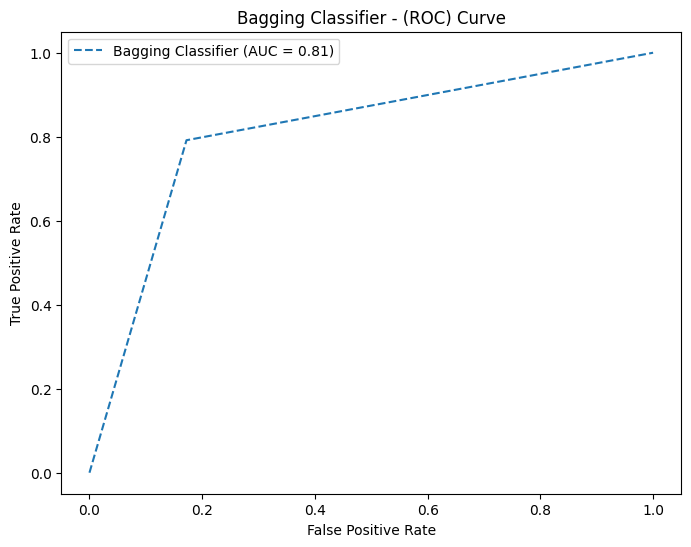

In [118]:
from sklearn.ensemble import BaggingClassifier
#Considering Decision Tree as the Base Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

#Defining and training the Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

#Prediciting from the test data
y_pred = bagging_classifier.predict(X_test)

#Calculating the Area Under Curve
dt_auc = roc_auc_score(y_test, y_pred)

#Generating the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

#Evaluating the performance of the model
bag_accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy: ",bag_accuracy)

#Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Bagging Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier - (ROC) Curve')
plt.legend()
plt.show()

**Ensemble**

In [119]:
from sklearn.ensemble import VotingClassifier

# Creating a hard Voting Classifier ensemble
hard_ensemble_classifier = VotingClassifier(estimators=[('svm', best_SVM), ('rf', rf_classifier), ('lr', best_clf)], voting='hard')

hard_ensemble_classifier.fit(X_train, y_train)

# Evaluating the ensemble on the training set
y_train_pred = hard_ensemble_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("The Training Performance for Hard Voting Ensemble Classifier is::")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

# Evaluating the ensemble on the validation set
y_valid_pred = hard_ensemble_classifier.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')

print("The Validation Performance for Hard Voting Ensemble Classifier is:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}\n")

# Evaluating the ensemble on the test set
y_test_pred = hard_ensemble_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("The Testing Performance for Hard Voting Ensemble Classifier is:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}\n")


The Training Performance for Hard Voting Ensemble Classifier is::
Accuracy: 0.8363
Precision: 0.8379
Recall: 0.8363
F1 Score: 0.8362

The Validation Performance for Hard Voting Ensemble Classifier is:
Accuracy: 0.8223
Precision: 0.8242
Recall: 0.8223
F1 Score: 0.8219

The Testing Performance for Hard Voting Ensemble Classifier is:
Accuracy: 0.8262
Precision: 0.8282
Recall: 0.8262
F1 Score: 0.8260



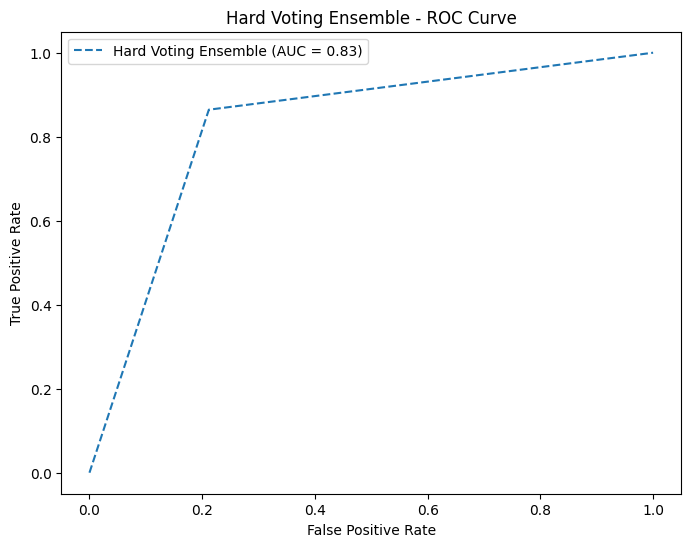

In [120]:
#Calculating Area Under Curve
hv_auc = roc_auc_score(y_test, y_test_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Hard Voting Ensemble (AUC = %0.2f)' % hv_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hard Voting Ensemble - ROC Curve')
plt.legend()
plt.show()

In [122]:
# Creating a soft Voting Classifier ensemble
soft_ensemble_classifier = VotingClassifier(estimators=[('svm', best_SVM), ('rf', rf_classifier), ('lr', best_clf)], voting='soft')

soft_ensemble_classifier.fit(X_train, y_train)

# Evaluating the ensemble on the training set
y_train_pred = soft_ensemble_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("The Training Performance for Soft Voting Ensemble Classifier is::")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

# Evaluating the ensemble on the validation set
y_valid_pred = soft_ensemble_classifier.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')

print("The Validation Performance for Soft Voting Ensemble Classifier is:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}\n")

# Evaluating the ensemble on the test set
y_test_pred = soft_ensemble_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("The Testing Performance for Soft Voting Ensemble Classifier is:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}\n")

The Training Performance for Soft Voting Ensemble Classifier is::
Accuracy: 0.8588
Precision: 0.8597
Recall: 0.8588
F1 Score: 0.8587

The Validation Performance for Soft Voting Ensemble Classifier is:
Accuracy: 0.8276
Precision: 0.8295
Recall: 0.8276
F1 Score: 0.8272

The Testing Performance for Soft Voting Ensemble Classifier is:
Accuracy: 0.8345
Precision: 0.8362
Recall: 0.8345
F1 Score: 0.8343



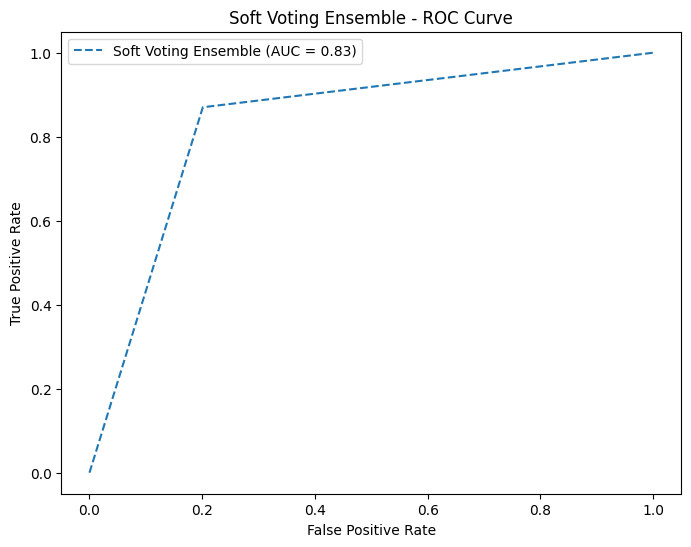

In [123]:
#Calculating Area Under Curve
sv_auc = roc_auc_score(y_test, y_test_pred)

#Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Soft Voting Ensemble (AUC = %0.2f)' % sv_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Soft Voting Ensemble - ROC Curve')
plt.legend()
plt.show()

**References Used**
1. ChatGPT to understand and do some parts of code.
2. References mentioned in report.
3. Kaggle codes to understand what kind of work has been done previously and what accuracies were obtained.